# CODELAB: PRECISION ENGINEERING FOR MACHINE LEARNING

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/code/victorjacobasuquo/precision-engineering-for-machine-learning/edit"><img src="https://www.kaggle.com/static/images/site-logo.svg" height="70" width="70" />Run in Kaggle</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1WddpVA9SLYtqCYLxgfBhauYbULJby3Qq"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Victorasuquo/Precision-Engineering-for-Machine-Learning"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## < Overview >
Artificial Intelligence Generally is based on data. In some cases we observed Machine Learning Models being biased and performing poorly when used. How do you boost the performance and Accuracy of Machine Learning Models. This is what we will learn step by step and as well leverage Techniques such as Log loss, regularization, Cost Function Optimization, Gradient Descent etc.

## < Abstarct >
In this practical Codelab session, we will dive into the basics of building Machine Learning Models with an increased performance using the leveraging best practices for techniques such as:

- **Feature Engineering**
- **Log loss**
- **Gradient Descent**
- **Vectorization**
- **Weight**
- **Cost Function Optimization**
- Identifying the Right **Metrics** for each use case.
---
Throughout this session, we will use Jupyter Notebooks and Machine Learning Libraries including:

- **Scikit Learn**
- **Numpy**
- **Pandas**

## < Content Outline >

1. What is Precision Engineering and why we need it.
2. Techniques in Precision Engineering
   - Feature Engineering
   - Hyperparameter Tuning
   - Model Selection
   - Regularization
   - Cross-Validation
   - Ensemble Methods
   - Feature scaling 

## < Prerequisites for Attendees >

To attend the Precision Engineering for Machine Learning session, the following prerequisites are recommended:

1. Basic Knowledge of Machine Learning
2. Programming Skills (preferably Python)
3. Mathematics and Statistics Background
4. Data Analysis Skills:
5. Familiarity with Machine Learning Tools and Frameworks
e.g numpy, etc
---
Please note that these prerequisites will help attendees effectively understand and apply precision engineering techniques in machine learning.

However the goal is to keep it as simple as possible and free for anyone who is interested in Machine Learning.


Come let's dive into the world of Machine Learning.



# < Getting Started >

Reference:
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.coursera.org/specializations/machine-learning-introduction">Machine Learning Specialization By Andrew Ng|Stanford - Coursera</a>
  </td>
    
    
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"> />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Victorasuquo/Precision-Engineering-for-Machine-Learning"> />View source on GitHub</a>
  </td>
</table>



# What is Precision Engineering and why we need it

How do we know if the model we have trained on the dataset will producing effective and accurate results on the new input data.
We cannot conclude that the model has performed well based on the error rates or certain statistic measures (such as R square statistic) that we get from the dataset on which the model is trained.
The main problem is that there is no way of knowing if the model has high bias (underfitted) or high variance (overfitted) and how well the model will perform on new data just from the error rates from the model

* Precision engineering in machine learning refers to the meticulous and exact design, development, and optimization of machine learning models to achieve high performance, accuracy, and efficiency. This involves careful consideration of various aspects of the machine learning pipeline, from data preprocessing to model deployment - chatgpt


Although Precision and recall are performance metrics used for pattern recognition and classification in machine learning. These concepts are essential to build a perfect machine learning model which gives more precise and accurate results. We will look at the ways e can optimize models to improve the perfomance of the model while looking at the basic ML models

![Detected Crops](images\train_batch13141.jpg)


# Techniques in Precision Engineering

# Dataset

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


# The Ames Housing data


The dataset for this codelab consists of sale prices of residential property in Ames, Iowa, US, between 2006 and 2010. In total there are 2919 observations (rows) and 81 variables (columns) both numerical, categorical and discrete. The independent variable which we want to predict is the sale price.

The result will be evaluated with the root mean squared error between the logarithmised price of the prediction and the true sale price. For more details check out https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

<!-- <figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:1000px;height:300px;">
</figure> -->
![Data Set](images/C1_W1_L3_S1_Lecture_b.png)

In [1]:
# import the necessary Libraries that will be used for the project
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://github.com/Victorasuquo/Precision-Engineering-for-Machine-Learning/raw/main/Data%20Set/train.csv")


In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
df = data.copy()
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
#understand and have a brief description of the dataSet
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# df.info()
print(df.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

(1460, 81)


In [ ]:
# df.fillna(method='bfill', axis=0, inplace = True)
# df

In [ ]:
# missing_values_count = df.isnull().sum()
# missing_values_count

# df['PoolQC'].

Feature Engineering

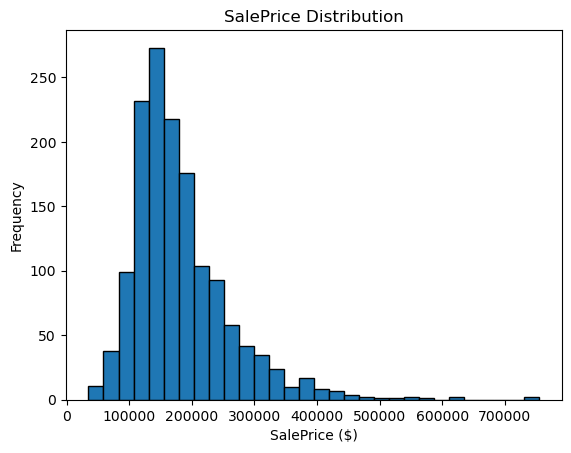

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.show()

Univariate Study

C:\Users\USER\AppData\Local\Temp\ipykernel_8692\1567064293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='SalePrice', ylabel='Density'>

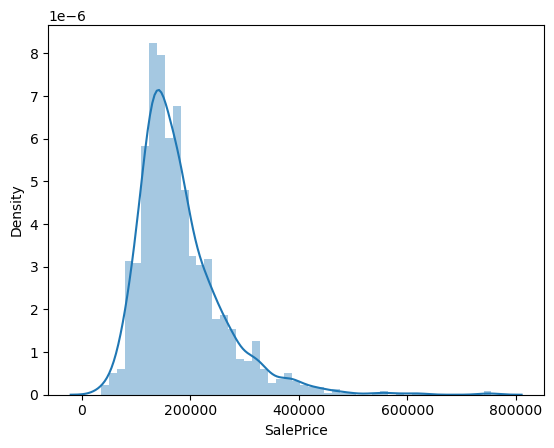

In [8]:
y = df['SalePrice']
sns.distplot(y)

This figure describes the distribution of target variable. It does not look like a normal distribution and seems to have heavy tail.
Skewness indicates the degreee of tilt in data, wheter it leans towards the left or the rigt, it exposing any asymmetry present. A positive skew indicates a tail extending towards the right, whereas a negative skew leans in the oppposite direction.

In [10]:
print(y.skew())
print(y.kurt())

1.8828757597682129
6.536281860064529


Skew and kurtosis of the distribution are 1.88 and 6.54 respectively.

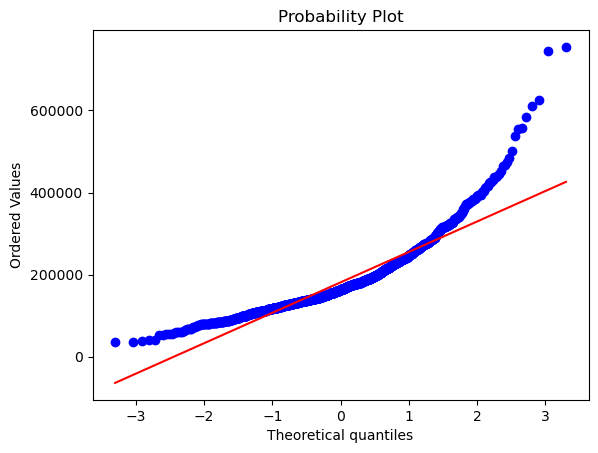

In [11]:
from scipy import stats

stats.probplot(y, plot=plt, dist='norm', fit=True);

This figure is probaility plot. Considering skew, kurtosis, and probability plot, we conclude that the distribution is not nomral distribution. Let's try a transform of the target variable with log(x)

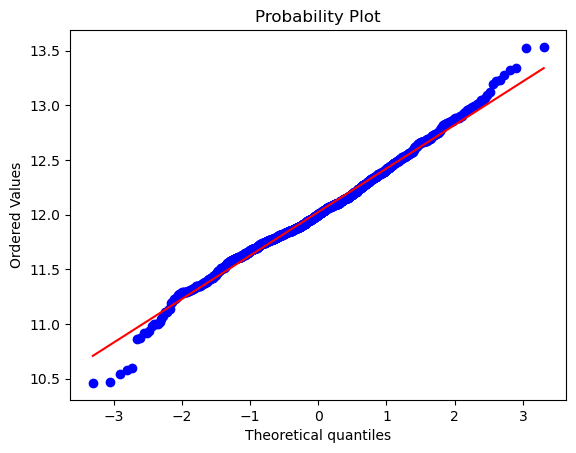

In [12]:
stats.probplot(np.log(y), plot=plt, dist='norm', fit=True);

In [13]:
print(np.log(y).skew())
print(np.log(y).kurt())

0.12133506220520406
0.8095319958036296


Given data seem to be on the line in the probability plot. Skew and kurtosis are 0.12 and 0.81 respectively. These facts imply that the target data spread with a normal distribution. In many cases, quadratic cost functions assume the gaussian noise, which gives you the normal distribution. Therefore, the transformed target variable is more convenient when working on optimization.

From now on, we use log(y) instead of y as a target variable.

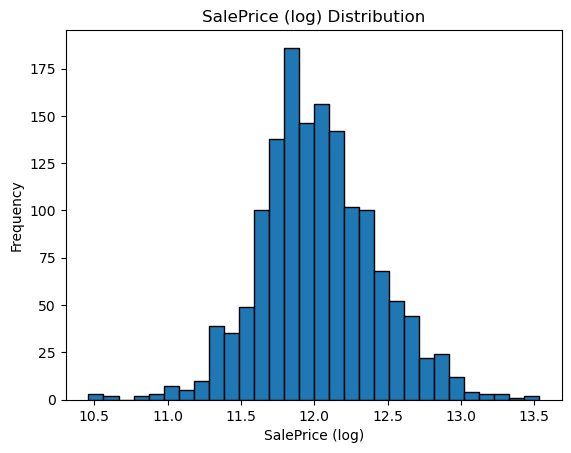

In [15]:
# Apply log transformation to the SalePrice column
log_saleprice = np.log(df['SalePrice'])

# Plotting the histogram for log-transformed SalePrice
plt.hist(log_saleprice, bins=30, edgecolor='black')
plt.title('SalePrice (log) Distribution')
plt.xlabel('SalePrice (log)')
plt.ylabel('Frequency')
plt.show()

In [16]:
data_types = df.dtypes

# Get count of missing values for each variable
missing_values = df.isnull().sum()

# Get the number of unique values for each variable
unique_values = df.nunique()

# For categorical variables, get the levels (unique values)
categorical_levels = {col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}

# Combine all the information into a single DataFrame
overview = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_values,
    'Unique Values': unique_values
})

# Add a column for levels in categorical variables
overview['Levels'] = overview.index.map(lambda col: categorical_levels[col] if col in categorical_levels else 'N/A')

# Display the overview DataFrame
print(overview.head(100))  # Print the first 100 rows to limit output

              Data Type  Missing Values  Unique Values  \
Id                int64               0           1460   
MSSubClass        int64               0             15   
MSZoning         object               0              5   
LotFrontage     float64             259            110   
LotArea           int64               0           1073   
Street           object               0              2   
Alley            object            1369              2   
LotShape         object               0              4   
LandContour      object               0              4   
Utilities        object               0              2   
LotConfig        object               0              5   
LandSlope        object               0              3   
Neighborhood     object               0             25   
Condition1       object               0              9   
Condition2       object               0              8   
BldgType         object               0              5   
HouseStyle    

In [17]:
# Calculate summary statistics for numeric columns
num_summary = df.select_dtypes(include=[np.number]).agg(['mean', 'min', 'max', pd.Series.nunique])

# Pivot the DataFrame to get the desired format
num_summary = num_summary.T.reset_index()
num_summary.columns = ['variable', 'mean', 'min', 'max', 'nUnique']

# Display the summary
print(num_summary.head(100))  # Print the first 100 rows to limit output

         variable           mean      min       max  nUnique
0              Id     730.500000      1.0    1460.0   1460.0
1      MSSubClass      56.897260     20.0     190.0     15.0
2     LotFrontage      70.049958     21.0     313.0    110.0
3         LotArea   10516.828082   1300.0  215245.0   1073.0
4     OverallQual       6.099315      1.0      10.0     10.0
5     OverallCond       5.575342      1.0       9.0      9.0
6       YearBuilt    1971.267808   1872.0    2010.0    112.0
7    YearRemodAdd    1984.865753   1950.0    2010.0     61.0
8      MasVnrArea     103.685262      0.0    1600.0    327.0
9      BsmtFinSF1     443.639726      0.0    5644.0    637.0
10     BsmtFinSF2      46.549315      0.0    1474.0    144.0
11      BsmtUnfSF     567.240411      0.0    2336.0    780.0
12    TotalBsmtSF    1057.429452      0.0    6110.0    721.0
13       1stFlrSF    1162.626712    334.0    4692.0    753.0
14       2ndFlrSF     346.992466      0.0    2065.0    417.0
15   LowQualFinSF       

In [18]:
numerical = [x for x in df.columns if df.dtypes[x]!='object']
# index is used instead of Id to identify an element
numerical.remove('Id')
numerical.remove('SalePrice')

categorical = [x for x in df.columns if df.dtypes[x]=='object']
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [21]:
df['SalePrice'] = np.log(df['SalePrice'])

Data cleaning is a key part of data science, but it can be deeply frustrating. Why are some of your text fields garbled? What should you do about those missing values? Why aren’t your dates formatted correctly? How can you quickly clean up inconsistent data entry?

# Multivariate Analysis
While some features have significant effects on the behavior SalePrice, otheres do not. In this section, we work on figuring relations between variables.

Before working on analysis, we have to deal with missing data. Let's roll!

Text(0.5, 1.0, 'The Number of Misssing Data')

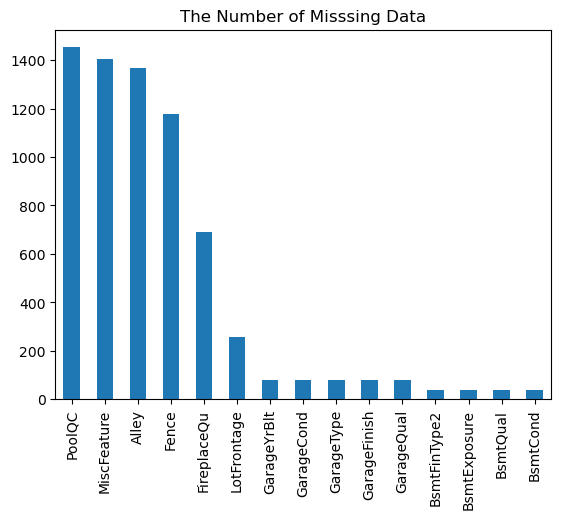

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
total[:15].plot(kind='bar')
plt.title('The Number of Misssing Data')

Most of candidates are missing top 3 features: PoolQC, MscFeature, and Alley. This may come from the fact that we do not care about these features when buying a house; e.g., we do not determine to purchase a house just because of the quality of pool (PoolQC).

For the sake of simplicity, we just treat these missing values as a new category 'MISSING' for category variables. For numerical variables, we use mean imputation.

In [23]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
for c in numerical:
    if df[c].isnull().any():
        df[c] = imp.fit_transform(df[c].values[:, np.newaxis])[:, 0]

for c in categorical:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

In [24]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL    65.000000     8450   Pave  MISSING   
1        2          20       RL    80.000000     9600   Pave  MISSING   
2        3          60       RL    68.000000    11250   Pave  MISSING   
3        4          70       RL    60.000000     9550   Pave  MISSING   
4        5          60       RL    84.000000    14260   Pave  MISSING   
5        6          50       RL    85.000000    14115   Pave  MISSING   
6        7          20       RL    75.000000    10084   Pave  MISSING   
7        8          60       RL    70.049958    10382   Pave  MISSING   
8        9          50       RM    51.000000     6120   Pave  MISSING   
9       10         190       RL    50.000000     7420   Pave  MISSING   
10      11          20       RL    70.000000    11200   Pave  MISSING   
11      12          60       RL    85.000000    11924   Pave  MISSING   
12      13          20       RL    70.049958    12968   Pave  MISSING   
13      14          20       RL    91.000000    10652   Pave  MISSING   
14      15          20       RL    70.049958    10920   Pave  MISSING   
15      16          45       RM    51.000000     6120   Pave  MISSING   
16      17          20       RL    70.049958    11241   Pave  MISSING   
17      18          90       RL    72.000000    10791   Pave  MISSING   
18      19          20       RL    66.000000    13695   Pave  MISSING   
19      20          20       RL    70.000000     7560   Pave  MISSING   
20      21          60       RL   101.000000    14215   Pave  MISSING   
21      22          45       RM    57.000000     7449   Pave     Grvl   
22      23          20       RL    75.000000     9742   Pave  MISSING   
23      24         120       RM    44.000000     4224   Pave  MISSING   
24      25          20       RL    70.049958     8246   Pave  MISSING   
25      26          20       RL   110.000000    14230   Pave  MISSING   
26      27          20       RL    60.000000     7200   Pave  MISSING   
27      28          20       RL    98.000000    11478   Pave  MISSING   
28      29          20       RL    47.000000    16321   Pave  MISSING   
29      30          30       RM    60.000000     6324   Pave  MISSING   
30      31          70  C (all)    50.000000     8500   Pave     Pave   
31      32          20       RL    70.049958     8544   Pave  MISSING   
32      33          20       RL    85.000000    11049   Pave  MISSING   
33      34          20       RL    70.000000    10552   Pave  MISSING   
34      35         120       RL    60.000000     7313   Pave  MISSING   
35      36          60       RL   108.000000    13418   Pave  MISSING   
36      37          20       RL   112.000000    10859   Pave  MISSING   
37      38          20       RL    74.000000     8532   Pave  MISSING   
38      39          20       RL    68.000000     7922   Pave  MISSING   
39      40          90       RL    65.000000     6040   Pave  MISSING   
40      41          20       RL    84.000000     8658   Pave  MISSING   
41      42          20       RL   115.000000    16905   Pave  MISSING   
42      43          85       RL    70.049958     9180   Pave  MISSING   
43      44          20       RL    70.049958     9200   Pave  MISSING   
44      45          20       RL    70.000000     7945   Pave  MISSING   
45      46         120       RL    61.000000     7658   Pave  MISSING   
46      47          50       RL    48.000000    12822   Pave  MISSING   
47      48          20       FV    84.000000    11096   Pave  MISSING   
48      49         190       RM    33.000000     4456   Pave  MISSING   
49      50          20       RL    66.000000     7742   Pave  MISSING   
50      51          60       RL    70.049958    13869   Pave  MISSING   
51      52          50       RM    52.000000     6240   Pave  MISSING   
52      53          90       RM   110.000000     8472   Grvl  MISSING   
53      54          20       RL    68.000000    50271   Pave  MISS

Text(0.5, 1.0, 'The Number of Misssing Data')

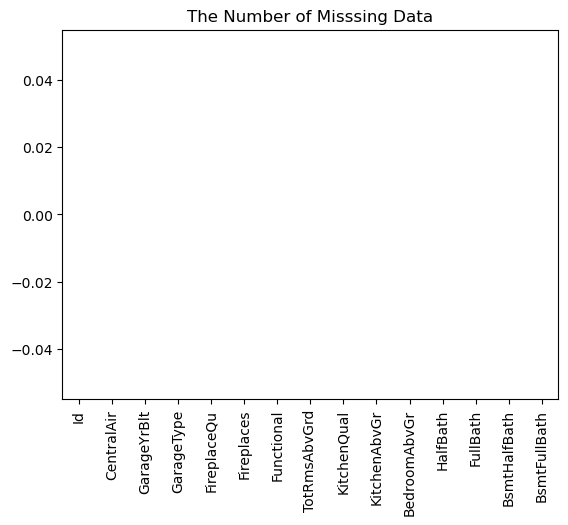

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
total[:15].plot(kind='bar')
plt.title('The Number of Misssing Data')

To analyze categorial variables along with numerical variables, we convert categorical variables into dummies.


In machine learning, converting data to dummies (also known as one-hot encoding) is a process used to transform categorical variables into a format that can be provided to machine learning algorithms to improve their performance. Many machine learning algorithms require numerical input data, and categorical data needs to be converted to numerical data.

Text(0.5, 1.0, 'Correlation Coefficient')

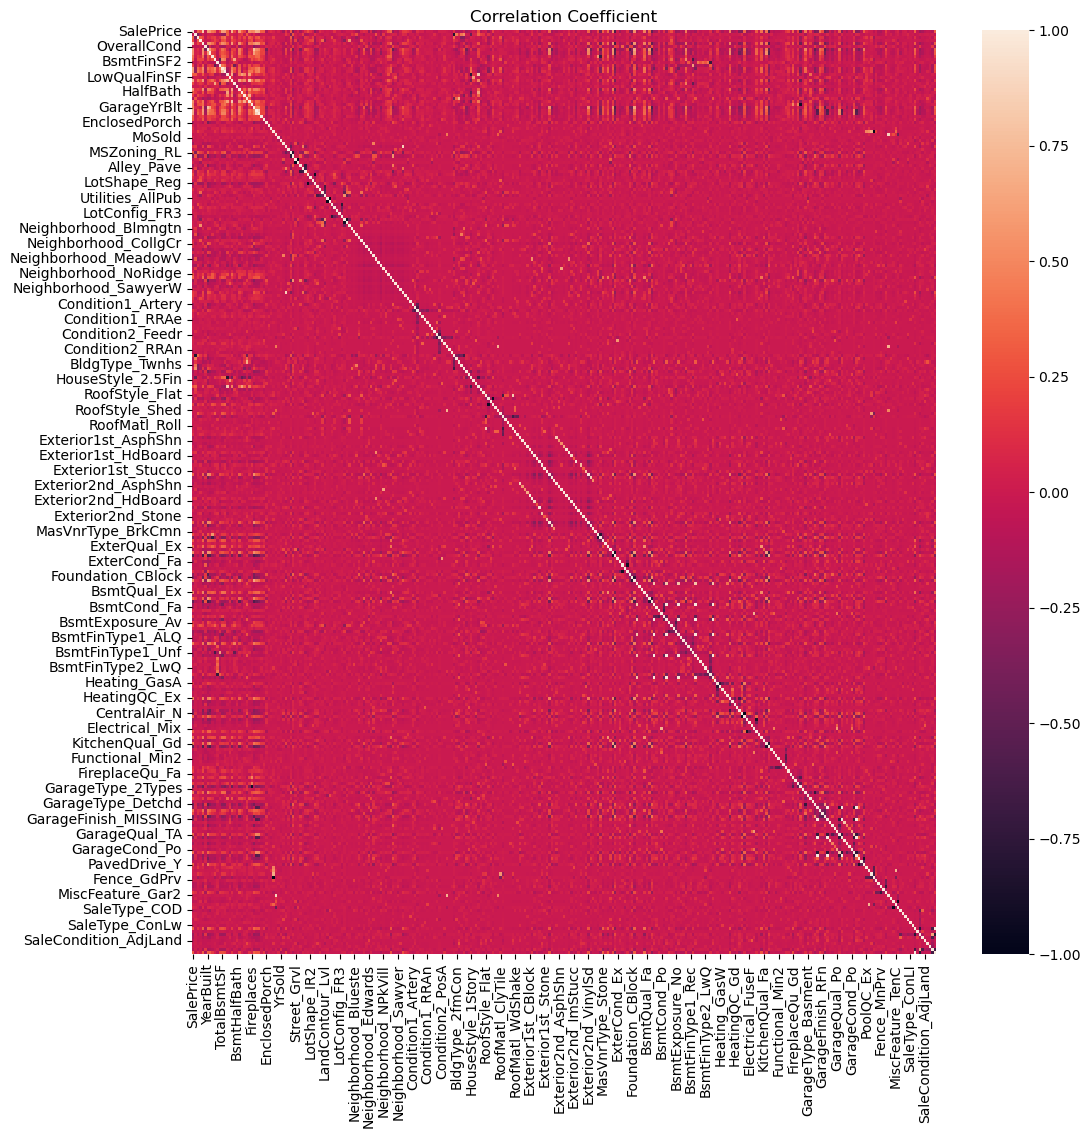

In [32]:
yx_data = df[['SalePrice', ] + numerical + categorical]
yx_data = pd.get_dummies(yx_data)

corrmat = yx_data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat);
plt.title('Correlation Coefficient')


Oops! Too many columns! We consider reducing the number of features to a subset of features strongly correlated with the target variable.

We here use 20 features. We extract 20 features that have the largest abolute value of correlation coefficient with the target variable.

In [36]:
abs_corrmat = corrmat.copy()
abs_corrmat[:] = np.abs(corrmat.values)

Text(0.5, 1.0, 'Correlation Coefficient')

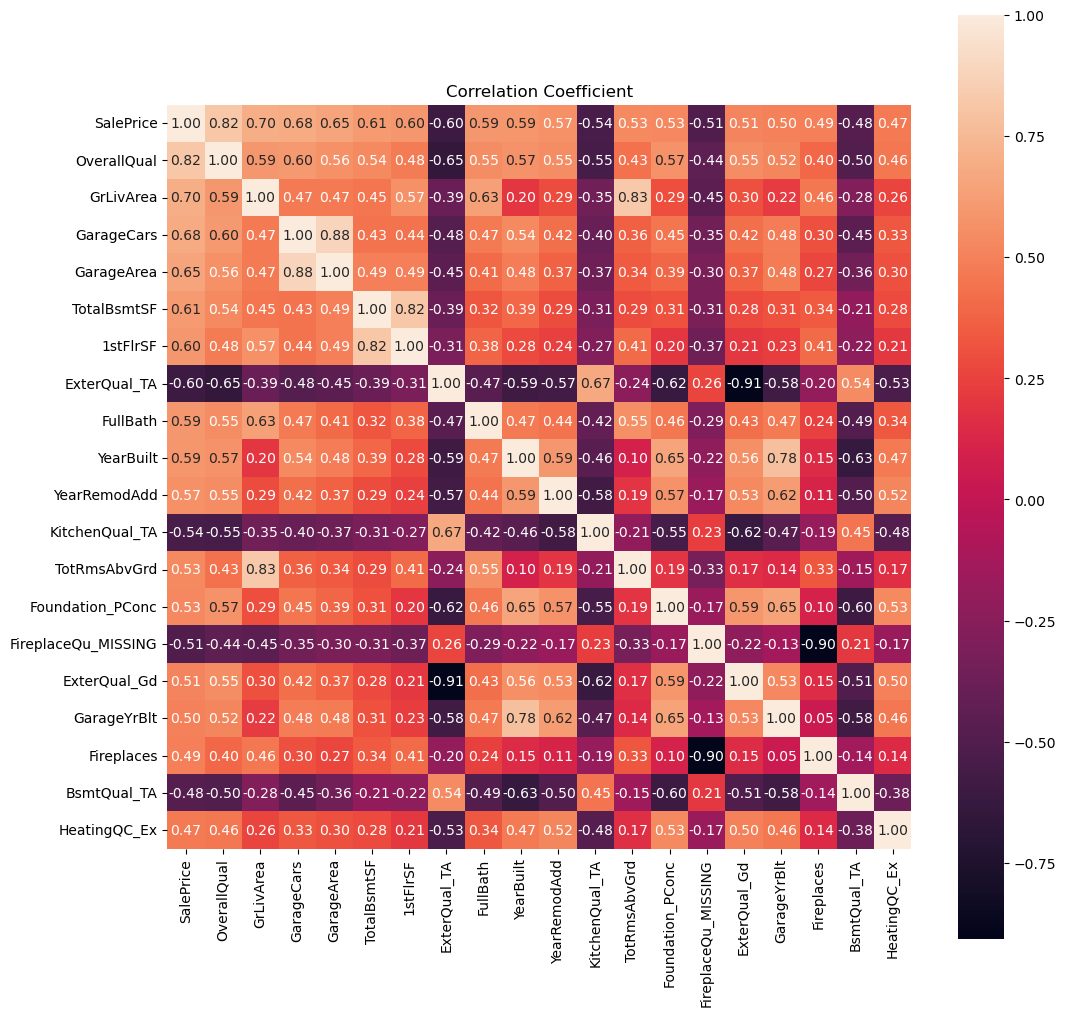

In [37]:
large_cols = abs_corrmat.nlargest(20, 'SalePrice')['SalePrice'].index
large_corrmat = corrmat.loc[large_cols, large_cols]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(large_corrmat, square=True, 
                       annot=True, cbar=True, fmt='.2f', 
                       xticklabels=large_cols.values, 
                       yticklabels=large_cols.values);
plt.title('Correlation Coefficient')

There are strong correlations in the following pairs: (GarageArea, GarageCars), (TotalBsmtSF, 1stFlrSF), (ExterQual_Gd, ExterQual_TA), (GarageYrBuilt, YearBuilt), and (TotRmsAbvTrd, GrLivArea). In the first pair, both express the size of garage. The second one describes the area of basement and first floor. The third one is separated just because of introducing dummy. Both elements in the fourth one explain how old. In the last one, each element expresses living area and total rooms. In any of the above five pairs, it is natural that two elements are correlated to each other within each pair. Therefore, it is good enough to use either of two elements for each pair.

# Mutual Information and What it Measures¶
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

Text(0.5, 1.0, 'Correlation Coefficient')

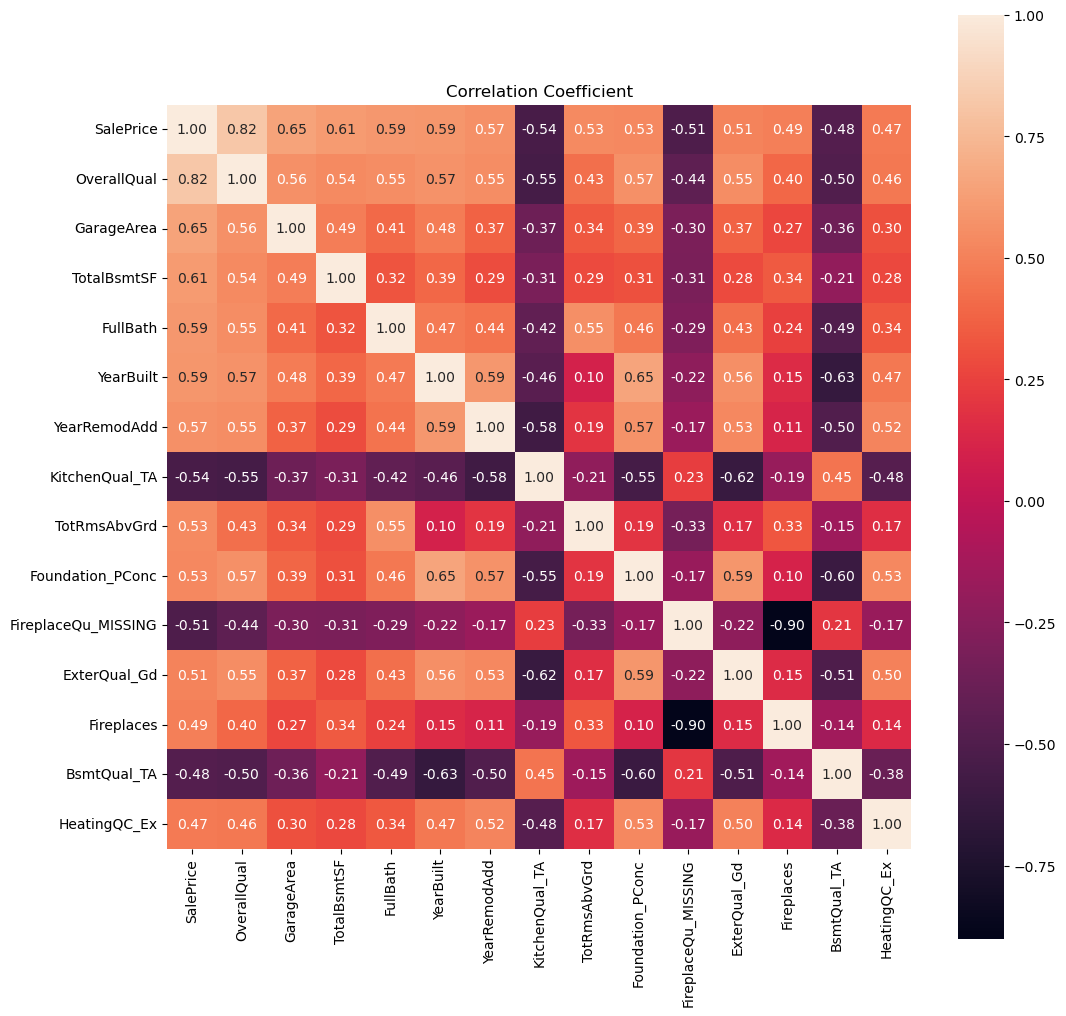

In [38]:
remove_cols = ['GarageCars', '1stFlrSF', 'ExterQual_TA', 
                            'GrLivArea', 'GarageYrBlt']
for x in remove_cols:
    large_cols = large_cols.drop(x)

large_corrmat = corrmat.loc[large_cols, large_cols]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(large_corrmat, square=True, 
                       annot=True, cbar=True, fmt='.2f', 
                       xticklabels=large_cols.values, 
                       yticklabels=large_cols.values);
plt.title('Correlation Coefficient')

Let's see more precise relations between the target variable and selected features.

In [39]:
# extract only feature name and avoid duplication
large_cat = list(set([x.split('_')[0] for x in large_cols.values if '_' in x]))
large_num = [x.split('_')[0] for x in large_cols.values if '_' not in x]
# make figures for YearBuilt and OverallQual seperately
large_num.remove('OverallQual')
large_num.remove('YearBuilt')

In [40]:
large_num

['SalePrice',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'Fireplaces']

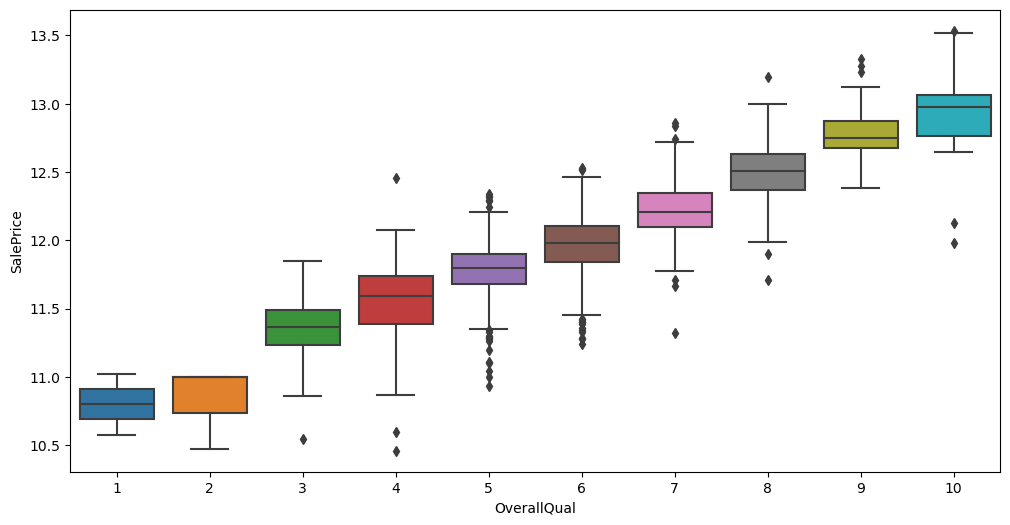

In [43]:
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice']);

# Purpose and Utility
Feature Extraction: The initial part of the code ensures that feature names are extracted and de-duplicated, which is important for handling categorical and numerical features separately.
Handling Specific Features: By removing 'OverallQual' and 'YearBuilt' from large_num, the code allows these features to be treated differently, perhaps due to their significance in the dataset.
Data Visualization: The boxplot provides a visual representation of how 'SalePrice' varies with 'OverallQual

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

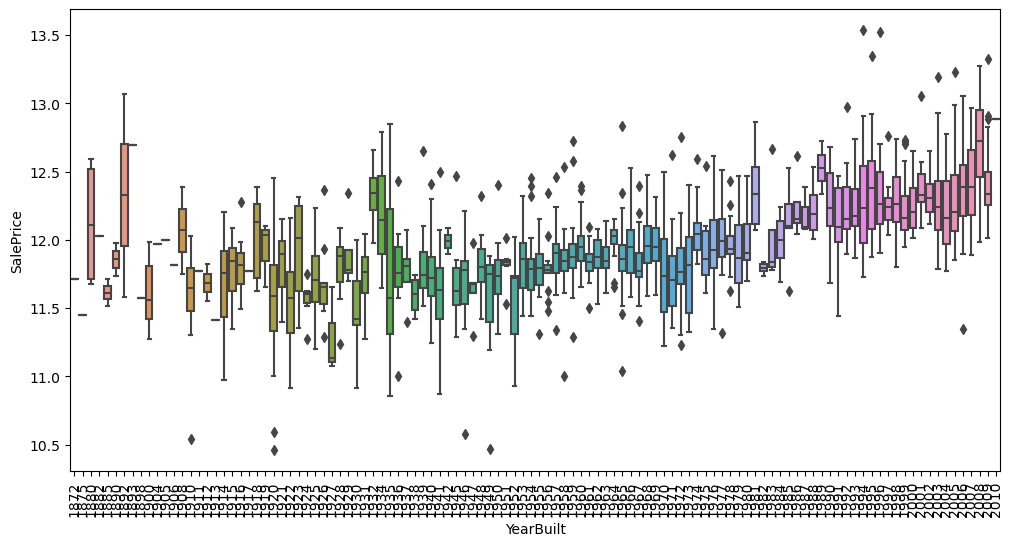

In [45]:
f, ax = plt.subplots(figsize=(12,  6))
sns.boxplot(x=df['YearBuilt'], y=df['SalePrice']);
plt.xticks(rotation=90)

There seems to be a tendency that newer houses have higher prices. Let's see the effects of other categorical variables on the target variable.

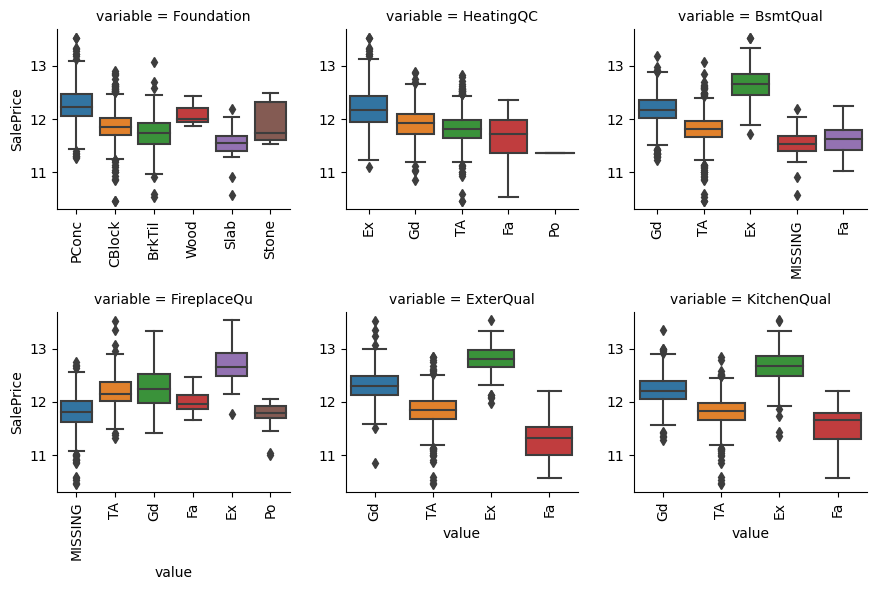

In [47]:
melted_train = pd.melt(df, id_vars=['SalePrice'], value_vars=large_cat)

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90);
    
g = sns.FacetGrid(melted_train, col='variable', col_wrap=3, 
                               sharex=False, sharey=False)
g.map(boxplot, 'value', 'SalePrice')

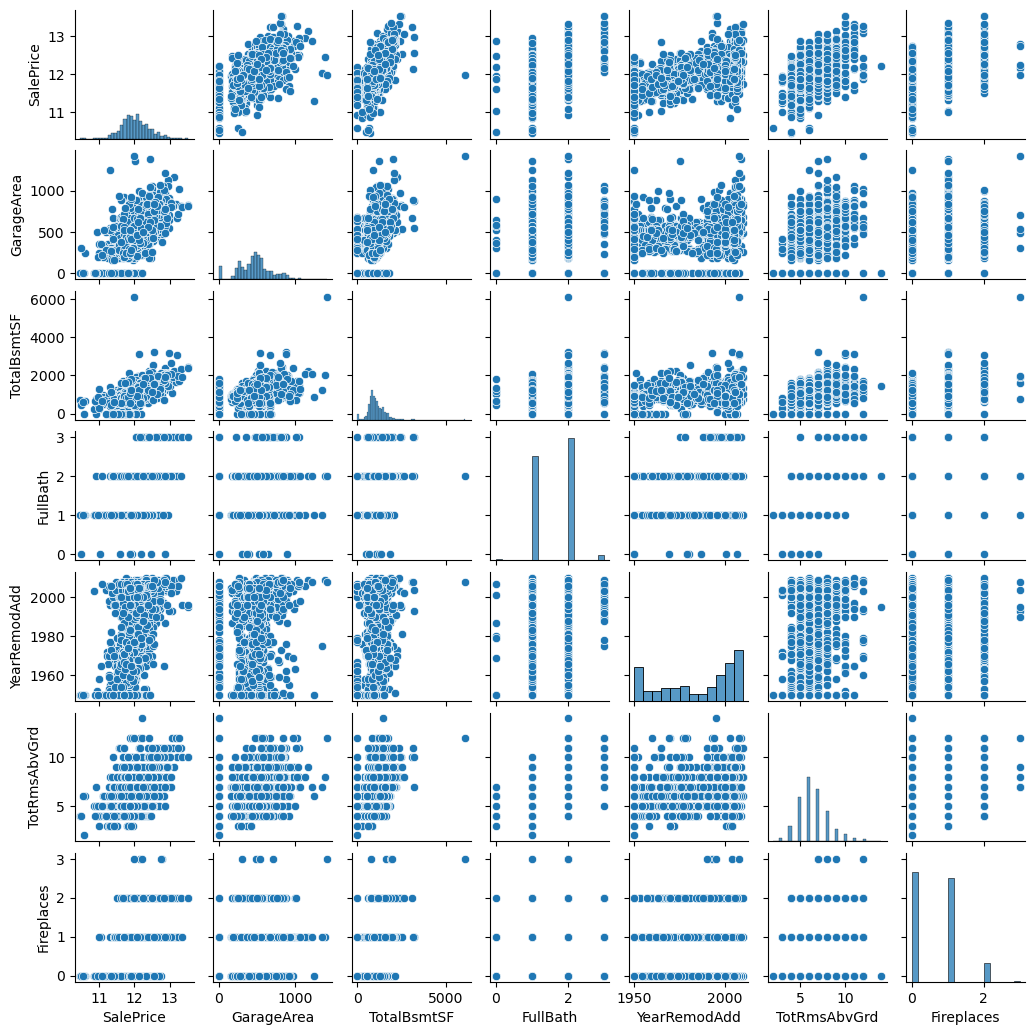

In [50]:
sns.pairplot(df[large_num], height=1.5);

If a house has a bigger value for a certain feature (like a larger number of bedrooms or a bigger square footage), it's likely to have a higher sale price.
If a house has a smaller value for a certain feature (like a smaller number of bedrooms or a smaller square footage), it's likely to have a lower sale price.

# Feature Selection
So far, we have been analyzing the relation through correlation coefficient and visualization. Random forest work as an alternative method to figure out the relations. Indeed, random forest is one of the most popular methods to select important features.

C:\Users\USER\AppData\Local\Temp\ipykernel_8692\2370350917.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


Text(0.5, 1.0, 'Feature Importance')

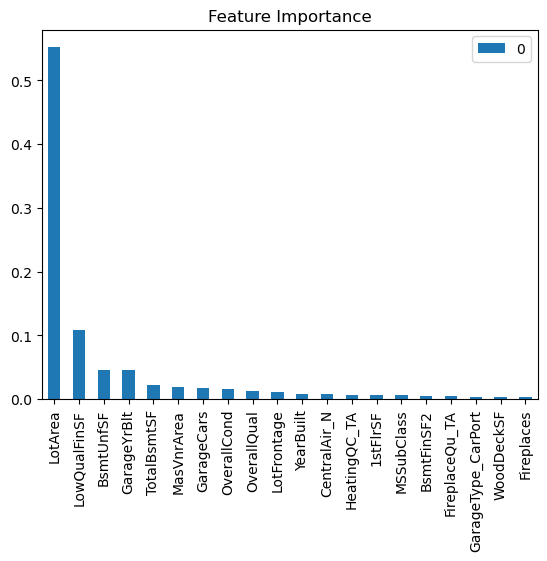

In [52]:
from sklearn.ensemble import RandomForestRegressor

X_full = yx_data[yx_data.columns.drop('SalePrice')]
y, X = df['SalePrice'].values[:, np.newaxis], X_full.values
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)

importance = clf.feature_importances_
argidx = np.argsort(importance)[::-1]
df_importance = pd.DataFrame(importance[argidx[:20]],
                                                       index=yx_data.columns.values[argidx[:20]])
imp_cols = yx_data.columns.values[argidx][:20]
df_importance.plot(kind='bar');
plt.title('Feature Importance')

This figure describes the 20 features with the largest feature of importance.

### Features selected Through correlation coefficient are

'LotArea', 'LowQualFinSF', 'BsmtUnfSF', 'GarageCars', 'GarageYrBlt', 'MasVnrArea', 'TotalBsmtSF', 'OverallCond', 'HeatingQC_TA', 'OverallQual', 'CentralAir_N', 'LotFrontage', '1stFlrSF', 'YearBuilt', 'BsmtFinSF2', 'GarageType_CarPort', 'MSSubClass', 'TotRmsAbvGrd', 'MSZoning_RL', 'WoodDeckSF'

## In the feature of importance, selected features are

'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_TA', 'TotRmsAbvGrd', 'Foundation_PConc', 'FireplaceQu_MISSING', 'ExterQual_Gd', 'GarageYrBlt', 'Fireplaces', 'BsmtQual_TA', 'HeatingQC_Ex'

## They share the following features:

'1stFlrSF', 'GarageCars', 'GarageYrBlt', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt'

0nly 7 features are shared. Besides that, the feature with the largest importance, 'LotArea' is not even selected as top 20 through correlation coefficient. Let's compare the performances through linear regression.

# Cross Validation

But, How do we know if the model we have trained on the dataset will producing effective and accurate results on the new input data.
We cannot conclude that the model has performed well based on the error rates or certain statistic measures (such as R square statistic) that we get from the dataset on which the model is trained.
The main problem is that there is no way of knowing if the model has high bias (underfitted) or high variance (overfitted) and how well the model will perform on new data just from the error rates from the model.
When it comes to predictive modeling, It’s the duty of the data scientist to ensure that the model is going to perform well on new data.
Cross Validation is a process that helps us do exactly this.

#### It is the process by which the machine learning models are evaluated on a separate set known as validation set or hold-out set with which the best hyper-parameters are found, so that we get the optimal model, that can be used on future data and which is capable of yielding the best possible predictions



One way of doing this is to split our dataset into 3 parts: Training Set, Validation or Hold-Out set and the Test Set.

![corss validate](images\validate.jpg) 

# Try out different chunks of Data

In [71]:
def error(y, y_pred):
    return np.mean((y - y_pred)**2)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kf = KFold(5)

y, X =yx_data['SalePrice'], yx_data[large_cols]

error_lr = []
for train, test in kf.split(X.values):
    X_train, X_test = X.values[train], X.values[test]
    y_train, y_test = y.values[train], y.values[test]
    lr = LinearRegression()
    lr.fit(X_train, y_train[:, np.newaxis])
    y_pred = lr.predict(X_test)[:, 0]
    error_lr.append(error(y_test, y_pred))
error_lr = np.mean(error_lr)
error_lr

1.5943203083929755e-28

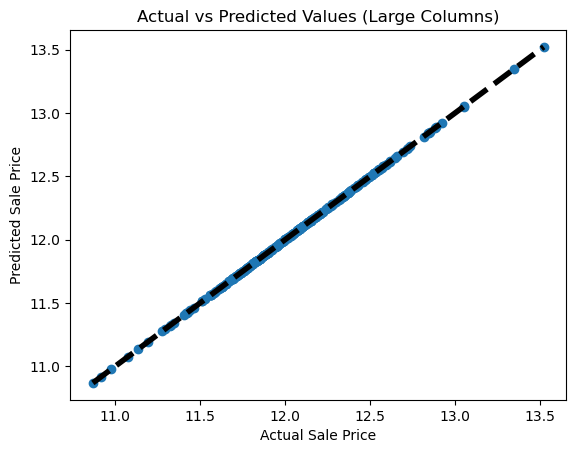

In [86]:

import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)

# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# Set the title and labels
plt.title('Actual vs Predicted Values (Large Columns)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

# Show the plot
plt.show()

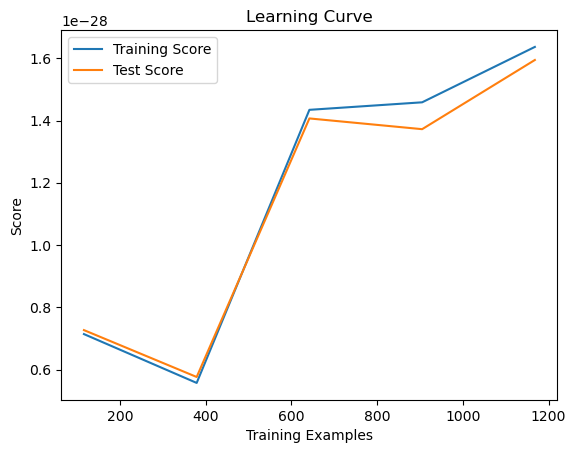

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

y, X = yx_data['SalePrice'], yx_data[large_cols]

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X.values, y.values, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [90]:
y, X =yx_data['SalePrice'], yx_data[imp_cols]
    
error_rf = []
for train, test in kf.split(X.values):
    X_train, X_test = X.values[train], X.values[test]
    y_train, y_test = y.values[train], y.values[test]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    error_rf.append(error(y_test, y_pred))
error_rf = np.mean(error_rf)
print("MSE (Important Columns): {:.2f}".format(error_rf))

MSE Important Columns): 0.03


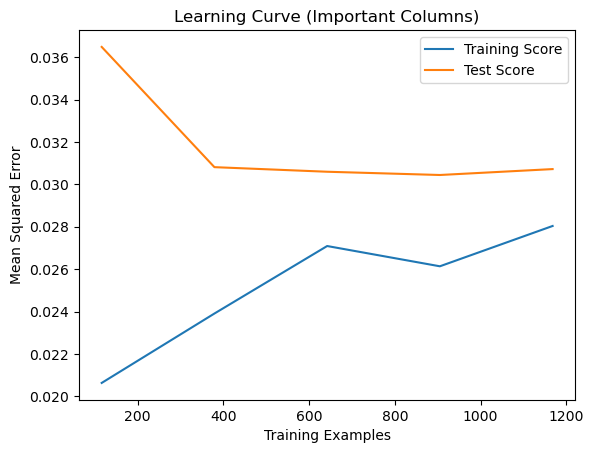

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

y, X = yx_data['SalePrice'], yx_data[imp_cols]

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X.values, y.values, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (Important Columns)')
plt.legend()
plt.show()

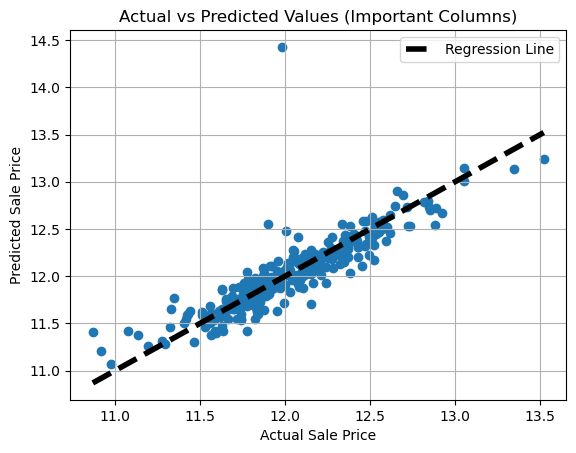

In [108]:
plt.scatter(y_test, y_pred)
# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Regression Line')

# Set the title and labels
plt.title('Actual vs Predicted Values (Important Columns)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.legend()
plt.show()

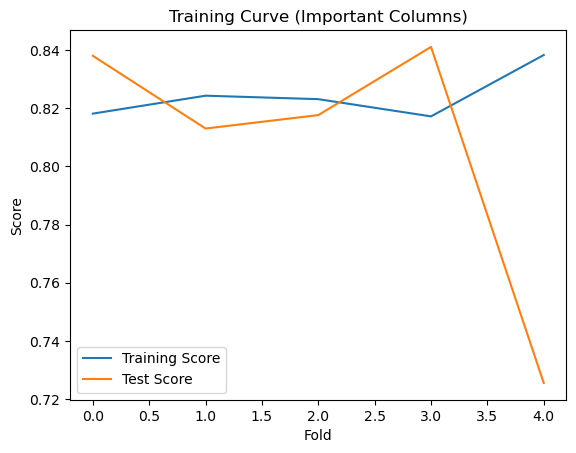

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(5)

y, X = yx_data['SalePrice'], yx_data[imp_cols]

train_scores = []
test_scores = []
for train, test in kf.split(X.values):
    X_train, X_test = X.values[train], X.values[test]
    y_train, y_test = y.values[train], y.values[test]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(train_scores, label='Training Score')
plt.plot(test_scores, label='Test Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Training Curve (Important Columns)')
plt.legend()
plt.show()

In [114]:

index = np.arange(len(yx_data.columns))
np.random.shuffle(index)
random_cols = yx_data.columns[index[:20]]
y, X =yx_data['SalePrice'], yx_data[random_cols]
    
error_random = []
for train, test in kf.split(X.values):
    X_train, X_test = X.values[train], X.values[test]
    y_train, y_test = y.values[train], y.values[test]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    error_random.append(error(y_test, y_pred))
error_random = np.mean(error_random)
error_random

0.06826695400289418

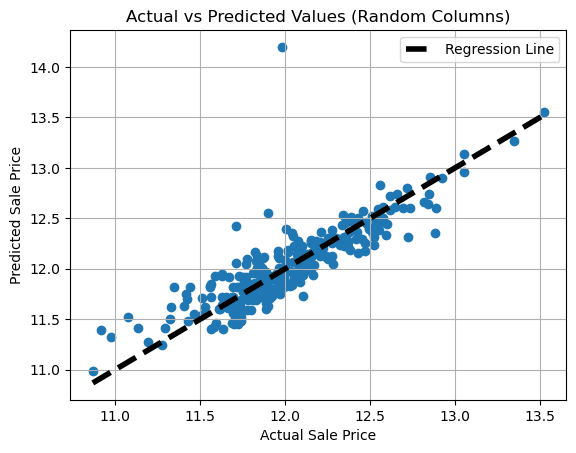

In [93]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)

# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Regression Line')

# Set the title and labels
plt.title('Actual vs Predicted Values (Random Columns)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.legend()
plt.show()

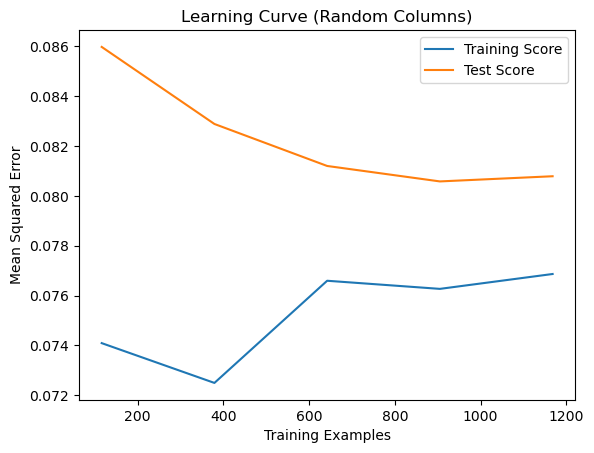

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(yx_data.columns))
np.random.shuffle(index)
random_cols = yx_data.columns[index[:20]]
y, X = yx_data['SalePrice'], yx_data[random_cols]

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X.values, y.values, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve (Random Columns)')
plt.legend()
plt.show()

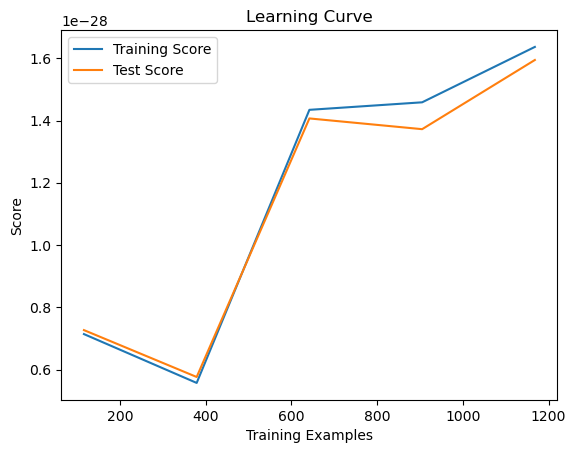

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

y, X = yx_data['SalePrice'], yx_data[large_cols]

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X.values, y.values, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:

# from sklearn.feature_selection import mutual_info_regression

# # Copying the DataFrame
# X = df.copy()
# y = X.pop("SalePrice")

# # Checking for NaN values before handling
# print("NaN values per column before handling:")
# print(X.isna().sum())

# from sklearn.impute import SimpleImputer

# # Create an imputer object
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer to the LotFrontage column and transform it
# X[['LotFrontage']] = imputer.fit_transform(X[['LotFrontage']])
# # Checking for NaN values after handling
# print("NaN values per column after handling:")
# print(X.isna().sum())

# # Label encoding for categorical variables
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()

# # Identifying discrete features
# discrete_features = X.dtypes.apply(lambda dtype: pd.api.types.is_integer_dtype(dtype))

# print(discrete_features)

# # Function to compute mutual information scores
# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# # Computing mutual information scores
# mi_scores = make_mi_scores(X, y, discrete_features)
# print(mi_scores[::3])  # Show a few features with their MI scores


In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
# Checking for NaN values
print("NaN values per column before handling:")
X = df.copy()
df.isnull().sum()

In [ ]:
for col in df.columns:
    print(f"{col}: {X[col].isna().sum()}")
    


In [ ]:
# y = X.pop("SalePrice")
len(y)

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes.apply(lambda dtype: pd.api.types.is_integer_dtype(dtype))


discrete_features


In [ ]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores
# # x

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram of LotArea
# plt.figure(figsize=(8, 6))
# sns.histplot(df['LotArea'], kde=True)
# plt.title('Histogram of LotArea')
# plt.xlabel('LotArea')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:

# Scatter plot of GrLivArea vs LotArea
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='LotArea', y='GrLivArea', data=df)
# plt.title('Scatter Plot of GrLivArea vs LotArea')
# plt.xlabel('LotArea')
# plt.ylabel('GrLivArea')
# # plt.show()


-----------------------------------------------------------------------------------------------
@misc{house-prices-advanced-regression-techniques,
    author = {Anna Montoya, DataCanary},
    title = {House Prices - Advanced Regression Techniques},
    publisher = {Kaggle},
    year = {2016},
    url = {https://kaggle.com/competitions/house-prices-advanced-regression-techniques}
}

In [ ]:

# # Bar chart of TotalBath
# plt.figure(figsize=(8, 6))
# sns.countplot(x='TotalBath', data=df)
# plt.title('Bar Chart of TotalBath')
# plt.xlabel('TotalBath')
# plt.ylabel('Frequency')
# plt.show()



In [ ]:
# # Histogram of Age
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Age'], kde=True)
# plt.title('Histogram of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()


In [ ]:

# # Scatter plot of LotArea_GrLivArea vs SalePrice
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='LotArea_GrLivArea', y='SalePrice', data=df)
# plt.title('Scatter Plot of LotArea_GrLivArea vs SalePrice')
# plt.xlabel('LotArea_GrLivArea')
# plt.ylabel('SalePrice')
# plt.show()

In [ ]:
for col in df.columns:
    print(f"{col}: {X[col].isna().sum()}")


Feature Engineering 

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships

Mutual Information and What it Measures¶
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding

In [ ]:
discrete_features

In [ ]:
X["LotFrontage"].isna

In [ ]:
# from sklearn.feature_selection import mutual_info_regression

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[::3] 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create new feature: total square footage
df['TotalSqFt'] = df['1stFlrSF'] + df['2ndFlrSF']

# Create new feature: age of home
df['Age'] = 2022 - df['YearBuilt']

# Create new feature: total number of bathrooms
df['TotalBath'] = df['FullBath'] + df['HalfBath']

# Scale features using StandardScaler
scaler = StandardScaler()
df[['LotArea', 'GrLivArea', 'TotalSqFt', 'Age', 'TotalBath']] = scaler.fit_transform(df[['LotArea', 'GrLivArea', 'TotalSqFt', 'Age', 'TotalBath']])

# Create new feature: polynomial interaction between LotArea and GrLivArea
df['LotArea_GrLivArea'] = df['LotArea'] ** 2 + df['GrLivArea'] ** 2

# Scale new feature using StandardScaler
scaler = StandardScaler()
df[['LotArea_GrLivArea']] = scaler.fit_transform(df[['LotArea_GrLivArea']])
df